# Self Organising Map Challenge

## The Kohonen Network

The Kohonen Self Organizing Map (SOM) provides a data visualization technique which helps to understand high dimensional data by reducing the dimensions of data to a map. SOM also represents clustering concept by grouping similar data together.

Unlike other learning technique in neural networks, training a SOM requires no target vector. A SOM learns to classify the training data without any external supervision.

![Network](http://www.pitt.edu/~is2470pb/Spring05/FinalProjects/Group1a/tutorial/kohonen1.gif)

### Structure
A network has a width and a height that descibes the grid of nodes.  For example, the grid may be 4x4, and so there would be 16 nodes.

Each node has a weight for each value in the input vector.  A weight is simply a float value that the node multiplies the input value by to determine how influential it is (see below)

Each node has a set of weights that match the size of the input vector.  For example, if the input vector has 10 elements, each node would have 10 weights.

### Training 
To train the network

1. Each node's weights are initialized.
2. We enumerate through the training data for some number of iterations (repeating if necessary).  The current value we are training against will be referred to as the `current input vector`
3. Every node is examined to calculate which one's weights are most like the input vector. The winning node is commonly known as the Best Matching Unit (BMU).
4. The radius of the neighbourhood of the BMU is now calculated. This is a value that starts large, typically set to the 'radius' of the lattice,  but diminishes each time-step. Any nodes found within this radius are deemed to be inside the BMU's neighbourhood.
5. Each neighbouring node's (the nodes found in step 4) weights are adjusted to make them more like the input vector. The closer a node is to the BMU, the more its weights get altered.
6. Go to step 2 until we've completed N iterations.
    

### Calculating the Best Matching Unit (BMU)

To determine the best matching unit, one method is to iterate through all the nodes and calculate the Euclidean distance between each node's weight vector and the current input vector. The node with a weight vector closest to the input vector is tagged as the BMU.

The Euclidean distance $\mathsf{distance}_{i}$ (from the input vector $V$ to the $i$th node's weights $W_i$)is given as (using Pythagoras):

$$ \mathsf{distance}_{i}=\sqrt{\sum_{k=0}^{k=n}(V_k - W_{i_k})^2}$$

where V is the current input vector and $W_i$ is the node's weight vector.  $n$ is the size of the input & weight vector.

*Note*: $V$ and $W$ are vectors.  $V$ is the input vector, and $W_i$ is the weight vector of the $i$th node.  $V_k$ and $W_{i_k}$ represent the $k$'th value within those vectors.  

The BMU is the node with the minimal distance for the current input vector

### Calculating the Neighbourhood Radius

The next step is to calculate which of the other nodes are within the BMU's neighbourhood. All these nodes will have their weight vectors altered.

First we calculate what the radius of the neighbourhood should be and then use Pythagoras to determine if each node is within the radial distance or not.

A unique feature of the Kohonen learning algorithm is that the area of the neighbourhood shrinks over time. To do this we use the exponential decay function:

Given a desired number of training iterations $n$:
$$n_{\mathsf{max iterations}} = 100$$

Calculate the radius $\sigma_t$ at iteration number $t$:

$$\sigma_t = \sigma_0 \exp\left(- \frac{t}{\lambda} \right) \qquad t = 1,2,3,4... $$

Where $\sigma_0$ denotes the neighbourhood radius at iteration $t=0$, $t$ is the current iteration. We define $\sigma_0$ (the initial radius) and $\lambda$ (the time constant) as below:

$$\sigma_0 = \frac{\max(width,height)}{2} \qquad \lambda = \frac{n_{\mathsf{max iterations}}}{\log(\sigma_0)} $$

Where $width$ & $height$ are the width and height of the grid.

### Calculating the Learning Rate

We define the initial leanring rate $\alpha_0$ at iteration $t = 0$ as:
$$\alpha_0 = 0.1$$

So, we can calculate the learning rate at a given iteration t as:

$$\alpha_t = \alpha_0 \exp \left(- \frac{t}{\lambda} \right) $$

where $t$ is the iteration number, $\lambda$ is the time constant (calculated above)
        
### Calculating the Influence

As well as the learning rate, we need to calculate the influence $\theta_t$ of the learning/training at a given iteration $t$.  

So for each node, we need to caclulate the euclidean distance $d_i$ from the BMU to that node.  Similar to when we calculate the distance to find the BMU, we use Pythagoras.  The current ($i$th) node's x position is given by $x(W_i)$, and the BMU's x position is, likewise, given by $x(Z)$.  Similarly, $y()$ returns the y position of a node.

$$ d_{i}=\sqrt{(x(W_i) - x(Z))^2 + (y(W_i) - y(Z))^2} $$

Then, the influence decays over time according to:

$$\theta_t = \exp \left( - \frac{d_{i}^2}{2\sigma_t^2} \right) $$

Where $\sigma_t$ is the neighbourhood radius at iteration $t$ as calculated above. 

Note: You will need to come up with an approach to x() and y().


### Updating the Weights

To update the weights of a given node, we use:

$$W_{i_{t+1}} = W_{i_t} + \alpha_t \theta_t (V_t - W_{i_t})$$
        
So $W_{i_{t+1}}$ is the new value of the weight for the $i$th node, $V_t$ is the current value of the training data, $W_{i_t}$ is the current weight and $\alpha_t$ and $\theta_t$ are the learning rate and influence calculated above.

*Note*: the $W$ and $V$ are vectors 

## Challenge

In this challenge, you need to implement a SOM such that it can categorise a set of random 3-dimensional colours.  The output should be an image of the organised data.  

### Expectations and Criteria
- Be prepared to talk through your decisions & thinking (we encourage you to include these in code comments too!)
- You may use any language you like (the examples given below are using Python)
- Avoid libraries that would do too much of the work for you. For example, in Python a good approach would be to use `numpy`, but no packages with SOM specific functionality
- Try and make your code as efficient as possible. Feel free to deviate from a literal interpretation of the instructions given under the **Training** heading above
- Consider the best way to structure your code and code base for later use by other developers or in anticipation of productionisation (you don't need to use a Jupyter Notebook)
- Include any tests you may have used (tests are not required however)
- Include a `Dockerfile` to package your code for production
- Be prepared to discuss your approach and process to productionise this application
- You can use code below to generate the trainig data of 10 colours:

In [ ]:
# Generate Data
import numpy as np
input_data = np.random.random((10,3))
input_data

array([[ 0.06623834,  0.41323115,  0.5055075 ],
       [ 0.27841281,  0.35846549,  0.46476453],
       [ 0.06462256,  0.63723597,  0.33711911],
       [ 0.56441382,  0.09053535,  0.55779798],
       [ 0.65837748,  0.95236121,  0.17537656],
       [ 0.79862749,  0.81493842,  0.56016761],
       [ 0.31951876,  0.67071923,  0.1332033 ],
       [ 0.51785355,  0.93340037,  0.48103237],
       [ 0.5538335 ,  0.35650457,  0.00457656],
       [ 0.90240766,  0.95776868,  0.39686523]])

### 1. Implement a Kohonen network
- Use the above description to implement a Kohonen network
- Make sure you can configure the size of the input vector and the size of the map
- Make sure node's weights are initialized to random values

In [ ]:
# Implement the network...

In [1]:
# torch implementation 

import torch  
import math
import matplotlib.pyplot as plt
import numpy as np

class Torch_SOM(torch.nn.Module):
  '''
  A Torch implementation of a Self Oranizing Map (SOM).
  Method: forward(input):               Forward pass of SOM. returns bmus for input batch
  Method: update(input):                Applies single update to SOM weights using input batch
  Method: fit(input, n_iter, fit_rand): trains SOM weights on input 
  Method: view_weights():               visualizes SOM weights as 2D image
  Attribute: width:     width of SOM
  Attribute: height:    height of SOM
  Attribute: n_inputs:  size of input SOM input vector, V
  Attribute: alpha_0:   initial learning rate
  Attribute: alpha:     current learning rate for training loop
  Attribute: sigma_0:   initial radius
  Attribute: sigma:     current radius for training loop
  Attribute: weights:   torch tensor of shape [height * width, n_inputs] containing SOM weights
  Attribute: locations: torch tensor of shape [height, width, 2] containing SOM node indexes
  '''
  
  def __init__(self, n_inputs=3, width=10, height=10, alpha_0=0.1):
    '''
    Constructor for SOM class
    Param: n_inputs: size of input SOM input vector, V, default = 3
    Param: width:    width of SOM, default = 10
    Param: height:   height of SOM, default = 10
    Param: alpha_0:  initial learning rate, default = 0.1
    Param: max_iter: maximum number of iterations/epochs in training loop, default = 500
    :return:
    '''
    
    super(Torch_SOM, self).__init__()

    self.width = width
    self.height = height
    self.n_inputs = n_inputs
    self.alpha_0 = alpha_0
    self.alpha = alpha_0
    # self.sigma_0 = max(width, height) / 2
    self.sigma_0 = width * height / 2.0
    # self.sigma_0 = width**2 + height**2
    self.sigma = self.sigma_0
    self.weights = torch.nn.Parameter(torch.rand(self.width * self.height, self.n_inputs), requires_grad=False)
    locations = [np.array([i, j]) for i in range(self.height) for j in range(self.width)]
    self.locations = torch.nn.Parameter(torch.tensor(np.array(locations), dtype=float), requires_grad=False)
    self.pdist_fn = torch.nn.PairwiseDistance(p=2)

  def forward(self, input):
    '''
    Forward Pass (torch style) of the Self Oranizing Map(SOM).
    Makes use of broadcasting for batch operations.
    Param: input: tensor of shape [batch size, input vector (V) size]
    :return:  bmu_location: tensor of shape [batch size, 2] containing x, y
                            co-ords for the bmu for each input in the batch
              losses:       tensor of shape [batch size] containing euclidean distances
                            for the bmu of each input in batch
    '''

    b_size = input.size()[0]
    if len(input.size()) == 1:
      input = input.unsqueeze(0)
    else:
      input = input.unsqueeze(1)
    distances = self.pdist_fn(input, self.weights)
    losses, bmu_idxs = torch.min(distances, -1)
    bmu_locations = self.locations[bmu_idxs]
    return bmu_locations, losses

  def update(self, input):
    '''
    batch weight update of the Self Oranizing Map(SOM).
    Makes use of broadcasting for batch operations.
    Param: input: tensor of shape [batch size, input vector (V) size]
    Param: t: epoch or step in training loop
    :return:  loss: value of average loss for the input batch bmu's
    '''

    b_size = input.size()[0]
    bmu_locations, losses = self.forward(input)
    if len(input.size()) == 1:
      input = input.unsqueeze(0)
    else:
      input = input.unsqueeze(1)
    loss = losses.sum().div_(b_size).item() 
    bmu_distance_squares = (self.locations.float() - bmu_locations.unsqueeze(1).float()).pow_(2).sum(dim=2)
    theta_t = bmu_distance_squares.neg_().div_(2 * self.sigma**2 + 1e-5).exp_()
    delta = theta_t.mul_(self.alpha).unsqueeze(2) * (input - self.weights)
    self.weights.add_(delta.mean(dim=0))
    return loss

  def fit(self, input, max_iter=None, fit_rand=False, device='cpu'):
    '''
    sklearn style fit method: trains SOM on batch of input data.
    Param: input: tensor of shape [batch size, input vector (V) size]
    Param: n_iter: number of epochs or steps in training loop
    Param: fit_rand: boolean, if true, will set training batch to tensor with same
                     shape as input but filled with new random values between
                     0.0 and 1.0 every epoch
    Param: device: device torch tensor is stored on (cpu or gpu)
    :return:  loss: value of average loss for the final training data batch bmu's
    '''

    lambda_0 = max_iter / math.log(self.sigma_0)

    n_samples = input.shape[0]
    for t in range(max_iter):
      if fit_rand:
        input = torch.rand(n_samples, self.n_inputs, dtype=torch.float).to(device)
      loss = self.update(input, t)
      self.sigma = self.sigma_0 * math.exp(-t / lambda_0)
      self.alpha = self.alpha_0 * math.exp(-t / lambda_0)

    return loss

  def view_weights(self):
    '''
    Visualizes the weights of the Self Oranizing Map(SOM)
    :return:
    '''

    image = self.weights.reshape(self.height, self.width, 3).cpu().numpy()
    plt.imshow(image)
    plt.show()

In [2]:
# numpy implementation

import math
import numpy as np
import matplotlib.pyplot as plt

class Numpy_SOM():
  '''
  A numpy implementation of a Self Oranizing Map (SOM).
  Method: forward(input):               Forward pass of SOM. returns bmus for input vector, V
  Method: update(input):                Applies single update to SOM weights using input vector, V
  Method: fit(input, n_iter, fit_rand): trains SOM weights on input vectors 
  Method: view_weights():               visualizes SOM weights as 2D image
  Attribute: width:     width of SOM
  Attribute: height:    height of SOM
  Attribute: n_inputs:  size of input SOM input vector, V
  Attribute: alpha_0:   initial learning rate
  Attribute: alpha:     current learning rate for training loop
  Attribute: sigma_0:   initial radius
  Attribute: sigma:     current radius for training loop
  Attribute: rand:      numpy random number generator
  Attribute: weights:   numpy ndarray of shape [height, width, n_inputs] containing SOM weights
  Attribute: locations: numpy ndarray of shape [height, width, 2] containing SOM node indexes
  '''

  def __init__(self, n_inputs, width=10, height=10, alpha_0=0.1, rand=None):
    '''
    Constructor for SOM class
    Param: n_inputs: size of input SOM input vector, V, default = 3
    Param: width:    width of SOM, default = 10
    Param: height:   height of SOM, default = 10
    Param: alpha_0:  initial learning rate, default = 0.1
    Param: rand:     numpy random number generator
    :return:
    '''

    self.width = width
    self.height = height
    self.n_inputs = n_inputs
    self.alpha_0 = alpha_0
    self.alpha = self.alpha_0
    # self.sigma_0 = max(SOM.shape[0], SOM.shape[1])/2
    self.sigma_0 = width * height / 2.0
    # self.sigma_0 = width**2 + height**2
    self.sigma = self.sigma_0
    if not rand:
      self.rand = np.random.RandomState(0)
    else:
      self.rand = rand
    self.weights = self.rand.random((self.width, self.height, self.n_inputs))
    self.locations = np.array([np.array([np.array([i, j], dtype=np.float32) for j in range(self.weights.shape[1])]) for i in range(self.weights.shape[0])])
  
  def forward(self, input):
    '''
    Forward Pass (torch style) of the Self Oranizing Map (SOM).
    Param: input: numpy array of shape [input vector (V) size]
    :return: numpy array of shape [2] containing x, y co-ords for the bmu
    '''
  
    subts = self.weights - input
    distSq = np.einsum('ijk,ijk->ij',subts, subts).reshape(-1)
    return np.array(np.unravel_index(np.argmin(distSq.reshape(-1), axis=0), self.weights.shape[:2])).astype(np.float32)

  def update(self, input):
    '''
    compute weight update of the Self Oranizing Map (SOM) for input vector V.
    Param: input: numpy array of shape [input vector (V) size]
    :return:
    '''

    bmu = self.forward(input)
    subts = self.locations - bmu
    dist = np.einsum('ijk,ijk->ij',subts, subts)
    dist = self.alpha * np.exp(-dist / (2 * self.sigma**2))
    return dist[:,:,None] * (input - self.weights)
  
  def fit(self, input, max_iter, fit_rand=False):
    '''
    sklearn style fit method: trains SOM on input data.
    Param: input: numpy array of shape [input vector (V) size]
    Param: n_iter: number of epochs or steps in training loop
    Param: fit_rand: boolean, if true, will set training data to tensor with same
                     shape as input but filled with new random values between
                     0.0 and 1.0 every epoch
    :return:
    '''
    
    lambda_0 = max_iter / math.log(self.sigma_0)

    for t in np.arange(0, max_iter):
        if fit_rand:
          input = self.rand.random((20,3))
        # self.rand.shuffle(input)      
        # self.update(input)
        new_weights = np.zeros(self.weights.shape)
        for x in input:      
          # self.update(x)
          new_weights += self.update(x)
        self.weights += new_weights/input.shape[0]
        # Update learning rate and radius
        self.alpha = self.alpha_0 * np.exp(-t / lambda_0)
        self.sigma = self.sigma_0 * np.exp(-t / lambda_0)   
  
  def view_weights(self):
    '''
    Visualizes the weights of the Self Oranizing Map (SOM)
    :return:
    '''

    image = self.weights.reshape(self.height, self.width, 3)
    plt.imshow(image)
    plt.show()

In [ ]:
# numpy/numba implementation

import math
import numpy as np
import matplotlib.pyplot as plt
from numba import jit, objmode

def get_bmu_from_distSq(ravelled_bmu_index, weights):
  '''
  Param: ravelled_bmu_index: bmu index in flattened SOM node location matrix
  Param: weights: numpy ndarray containing SOM weights of shape [SOM height, SOM width, input vector (V) size]
  return: numpy ndarray containing bmu index for 2D SOM node matrix of shape [2]
  '''

  bmu = np.unravel_index(ravelled_bmu_index, weights.shape[:2])
  return np.array(bmu).astype(np.float32)

@jit(nopython=True)
def _update(input, weights, locations, alpha, sigma):
  '''
  weight update of the Self Oranizing Map (SOM).
  Param: input: numpy ndarray containing SOM input vector V of shape [input vector (V) size]
  Param: weights: numpy ndarray containing SOM weights of shape [SOM height, SOM width, input vector (V) size]
  Param: locations: numpy ndarray containing node locations of shape [SOM height, SOM width, 2]
  Param: alpha: learning rate for current training loop iteration
  Param: sigma: radius for current training loop iteration
  :return: weight update for input vector, V
  '''

  distSq = np.zeros((weights.shape[0], weights.shape[1]))
  for i in range(weights.shape[0]):
    for j in range(weights.shape[1]):
      for k in range(weights.shape[2]):
        distSq[i,j] += (weights[i,j,k]-input[k])**2
  
  ravelled_bmu_index = np.argmin(distSq.reshape(-1))
  with objmode(bmu='float32[:]'):
    bmu = get_bmu_from_distSq(ravelled_bmu_index, weights)

  dist = np.zeros((locations.shape[0], locations.shape[1]))
  for i in range(locations.shape[0]):
    for j in range(locations.shape[1]):
      for k in range(locations.shape[2]):
        dist[i,j] += (locations[i,j,k]-bmu[k])**2

  for i in range(dist.shape[0]):
    for j in range(dist.shape[1]):
      dist[i,j] = alpha * np.exp(-dist[i,j] / (2 * sigma**2))

  weights_update = np.zeros(weights.shape)
  for i in range(dist.shape[0]):
    for j in range(dist.shape[1]):
      for k in range(input.shape[0]):
        weights_update[i,j,k] = dist[i,j] * (input[k] - weights[i,j,k])

  return weights_update

class Numba_SOM():
  '''
  A numpy implementation of a Self Oranizing Map (SOM).
  Method: forward(input):               Forward pass of SOM. returns bmu for input vector, V
  Method: update(input):                Computes single update to SOM weights for input vector, V
  Method: fit(input, n_iter, fit_rand): trains SOM weights on input vectors
  Method: view_weights():               visualizes SOM weights as 2D image
  Attribute: width:     width of SOM
  Attribute: height:    height of SOM
  Attribute: n_inputs:  size of input SOM input vector, V
  Attribute: alpha_0:   initial learning rate
  Attribute: alpha:     current learning rate for training loop
  Attribute: sigma_0:   initial radius
  Attribute: sigma:     current radius for training loop
  Attribute: rand:      numpy random number generator
  Attribute: weights:   numpy ndarray of shape [height, width, n_inputs] containing SOM weights
  Attribute: locations: numpy ndarray of shape [height, width, 2] containing SOM node indexes
  '''

  def __init__(self, n_inputs, width=10, height=10, alpha_0=0.1, rand=None):
    '''
    Constructor for SOM class
    Param: n_inputs: size of input SOM input vector, V, default = 3
    Param: width:    width of SOM, default = 10
    Param: height:   height of SOM, default = 10
    Param: alpha_0:  initial learning rate, default = 0.1
    Param: rand:     numpy random number generator
    :return:
    '''

    self.width = width
    self.height = height
    self.n_inputs = n_inputs
    self.alpha_0 = alpha_0
    self.alpha = self.alpha_0
    # self.sigma_0 = max(self.width, self.height)/2
    self.sigma_0 = width * height / 2.0
    # self.sigma_0 = width**2 + height**2
    self.sigma = self.sigma_0
    if not rand:
      self.rand = np.random.RandomState(0)
    else:
      self.rand = rand
    self.weights = self.rand.random((self.width, self.height, self.n_inputs))
    self.locations = np.array([np.array([np.array([i, j], dtype=np.float32) for j in range(self.weights.shape[1])]) for i in range(self.weights.shape[0])])

  def update(self, input):
    '''
    compute weight update of the Self Oranizing Map (SOM) for input vector, V.
    Param: input: numpy array of shape [input vector (V) size]
    :return: weight update for input vector, V
    '''

    return _update(input, self.weights, self.locations, self.alpha, self.sigma)

  def fit(self, input, max_iter, fit_rand=False):
    '''
    sklearn style fit method: trains SOM on input data.
    Param: input: numpy array of shape [num training samples, input vector (V) size]
    Param: max_iter: number of epochs or iterations in training loop
    Param: fit_rand: boolean, if true, will set training batch to tensor with same
                     shape as input but filled with new random values between
                     0.0 and 1.0 every epoch
    :return:  loss: value of average loss for the final training data batch bmu's
    '''

    lambda_0 = max_iter / math.log(self.sigma_0)

    for t in np.arange(0, max_iter):
        if fit_rand:
          input = self.rand.random((20,3))
        # self.rand.shuffle(input)
        new_weights = np.zeros(self.weights.shape)
        for x in input:
          # self.weights += self.update(x)      
          new_weights += self.update(x)
        self.weights += new_weights/input.shape[0]
        # Update learning rate and radius
        self.alpha = self.alpha_0 * np.exp(-t / lambda_0)
        self.sigma = self.sigma_0 * np.exp(-t / lambda_0)   
  
  def view_weights(self):
    '''
    Visualizes the weights of the Self Oranizing Map (SOM)
    :return:
    '''

    image = self.weights.reshape(self.height, self.width, 3)
    plt.imshow(image)
    plt.show()

### 2. Train a 10x10 network over 100 iterations

- Training data is a random set of 20 colours
- How long does this take?
- What does the map look like? (You will need to translate the weights of each node in the map to pixel data)
- What does this look like if you perform 200 & 500 iterations?

You should end up with something that looks like below after 500 iterations:

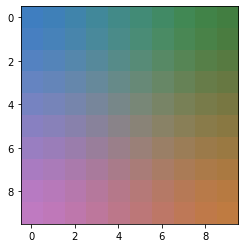

0.545170971999994


In [4]:
# train torch implementation on random colours
import timeit

def run_colour_test(view=True, save_path=None):
  device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
  m = 10
  n = 10
  n_samples = 20 # Number of training examples
  n_inputs = 3
  n_iter = 500

  # Initialize the training data
  rand = np.random.RandomState(0)
  input_data = rand.random((n_samples,n_inputs))
  train_data = torch.tensor(input_data).float().to(device) 
  torch.manual_seed(0)
  # train_data = torch.rand(n_samples, 3, dtype=torch.float).to(device)

  som = Torch_SOM(n_inputs=n_inputs, width=m, height=n, alpha_0=1.0, max_iter=n_iter).to(device)
  som.fit(train_data, n_iter=n_iter, fit_rand=True, device=device)
  
  if view:
    som.view_weights()
  
  if save_path:
    torch.save(som.state_dict(), save_path)

print(timeit.timeit(stmt=run_colour_test, number=1)/1)

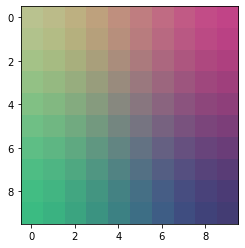

0.3171948150000077


In [5]:
# train numpy implementation on random colours
import timeit

def run_colour_test(vis=True):
  m = 10
  n = 10
  n_samples = 20 # Number of training examples
  n_inputs = 3
  n_iter = 500
  rand = np.random.RandomState(0)

  # Initialize the training data
  train_data = rand.random((n_samples,n_inputs))

  som = Numpy_SOM(n_inputs, width=m, height=n, alpha_0=1.0, max_iter=n_iter, rand=rand)
  som.fit(train_data, n_iter, fit_rand=True)
  
  if vis:
    som.view_weights()

print(timeit.timeit(stmt=run_colour_test, number=1)/1)

In [ ]:
# train numpy/numba implementation on random colours
import timeit

def run_colour_test(vis=True):
  m = 10
  n = 10
  n_samples = 20 # Number of training examples
  n_inputs = 3
  n_iter = 500
  rand = np.random.RandomState(0)

  # Initialize the training data
  train_data = rand.random((n_samples,n_inputs))

  som = Numba_SOM(n_inputs, width=m, height=n, alpha_0=1.0, max_iter=n_iter, rand=rand)
  som.fit(train_data, n_iter, fit_rand=True)
  
  if vis:
    som.view_weights()

print(timeit.timeit(stmt=run_colour_test, number=1)/1)
print(timeit.timeit(stmt=run_colour_test, number=1)/1)

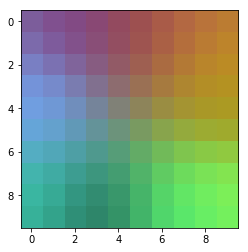

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(image_data)

### 3. Train a 100x100 network over 1000 iterations

- This network will likely be significantly slower to train
- What could you do to improve performance?
- What does the network look like after 1000 iterations?

You should end up with something like below:

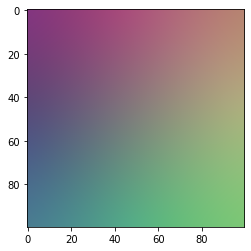

1.0380171450001399


In [ ]:
# train torch implementation on random colours
import timeit

def run_colour_test(view=True, save_path=None):
  device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
  m = 100
  n = 100
  # Number of training examples
  n_samples = 20
  n_inputs = 3
  n_iter = 1000

  # Initialize the training data
  rand = np.random.RandomState(0)
  input_data = rand.random((n_samples,n_inputs))
  train_data = torch.tensor(input_data).float().to(device)
  torch.manual_seed(0)
  # train_data = torch.rand(n_samples, 3, dtype=torch.float).to(device)
  som = Torch_SOM(n_inputs=n_inputs, width=m, height=n, alpha_0=5.0, max_iter=n_iter).to(device)
  som.fit(train_data, n_iter=n_iter, fit_rand=True, device=device)
  
  if view:
    som.view_weights()
  
  if save_path:
    torch.save(som.state_dict(), save_path)

print(timeit.timeit(stmt=run_colour_test, number=1)/1)

# see GPU train time below!

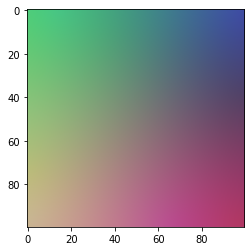

21.146906009000077


In [ ]:
# train numpy implementation on random colours
import timeit

def run_colour_test(vis=True):
  m = 100
  n = 100
  # Number of training examples
  n_samples = 20 #3000
  n_inputs = 3
  n_iter = 1000
  rand = np.random.RandomState(0)

  # Initialize the training data
  train_data = rand.random((n_samples,n_inputs))

  som = Numpy_SOM(n_inputs, width=m, height=n, alpha_0=10.0, max_iter=n_iter, rand=rand)
  som.fit(train_data, n_iter, fit_rand=True)
  
  if vis:
    som.view_weights()

print(timeit.timeit(stmt=run_colour_test, number=1)/1)

In [ ]:
# train numba/numpy implementation on random colours
import timeit

def run_colour_test(vis=True):
  m = 100
  n = 100
  # Number of training examples
  n_samples = 20 #3000
  n_inputs = 3
  n_iter = 1000
  rand = np.random.RandomState(0)

  # Initialize the training data
  train_data = rand.random((n_samples,n_inputs))

  som = Numba_SOM(n_inputs, width=m, height=n, alpha_0=1.0, max_iter=n_iter, rand=rand)
  som.fit(train_data, n_iter, fit_rand=True)
  
  if vis:
    som.view_weights()

print(timeit.timeit(stmt=run_colour_test, number=1)/1)
print(timeit.timeit(stmt=run_colour_test, number=1)/1)

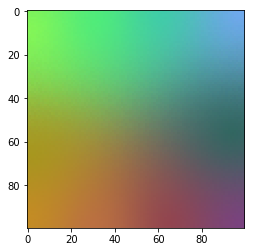

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(image_data)